![Rick and My Job](https://raw.githubusercontent.com/homosociologicus/changellenge/master/images/rick_and_my_job.jpg)

# Упражнение 1: if elif else

Год является високосным, если:
- он делится на 4 и не делится на 100 или
- он делится на 400

Ввод: целое число >= 0

Вывод: `YES` если високосный, иначе `NO`

Пример:

`2020
YES`

In [1]:
A = int(input())
if A % 4 == 0 and A % 100 != 0 or A % 400 == 0:
    print('YES')
else:
    print('NO')

2020
YES


Выведите максимальное число из 3 заданных (не используйте функцию, это скучно)

Ввод: 3 целых числа

Вывод: максимальное число

Пример:

`1
2
3
3`

In [2]:
x = int(input())
y = int(input())
z = int(input())
if x >= y and x >= z:
    print(x)
elif y >= x and y >= z:
    print(y)
else:
    print(z)

1
2
3
3


Бонусное упражнение

![Coordinates](https://raw.githubusercontent.com/homosociologicus/changellenge/master/images/coordinates.png)

Ввод: 4 ненулевых числа: x1, y1, x2, y2

Вывод: `YES` если они в одной четверти, иначе `NO`

Пример:

`1
-3
2
2
NO`

Подсказка: попробуйте понять, что объединяет точки в одной четверти и как это можно записать

In [3]:
x1 = float(input())
y1 = float(input())
x2 = float(input())
y2 = float(input())
if x1 * x2 > 0 and y1 * y2 > 0:
    print('YES')
else:
    print('NO')

1
-3
2
2
NO


# Упражнение 2: циклы for, while

Сумма последовательности

Ввод: случайные ненулевые целые числа, 0 заканчивает последовательность

Вывод: число, равное сумме последовательности

Пример:

`1
2
3
4
5
6
7
8
9
10
0
55`

In [4]:
num = int(input())
sum_all = 0
while num != 0:
    sum_all += num
    num = int(input())
print(sum_all)

1
2
3
4
5
6
7
8
9
10
0
55


Старые добрые числа Фибоначчи. "Нулевое" число 0, первое 1, второе 1, далее 2, 3, 5, 8, 13, 21, ...

Ввод: номер числа Фибоначчи >= 1

Вывод: соответствующее число Фибоначчи

Пример:

`8
21`

In [5]:
n = int(input())
prev = 0
curr = 1
i = 1
while i < n:
    prev, curr = curr, prev + curr
    i += 1
print(curr)

8
21


Снова делимость. Для каждого числа последовательности выведите ближайшее снизу число, делящееся на 9. Если само число делится на 9, выведите его. Считать последовательность на вводе можно с помощью

`my_list = list(map(int, input().split()))`

и, кстати, `list` здесь не нужен (если знаете почему, то это здорово!)

Ввод: последовательность целых чисел, разделенных пробелами

Вывод: последовательность чисел, каждое из которых на новой строке

Пример:

`1 10 21 28 36 44
0
9
18
27
36
36`

In [6]:
for num in map(int, input().split()):
    print(num // 9 * 9)

1 10 21 28 36 44
0
9
18
27
36
36


# <center> Настала пора сразиться с реальной задачей </center>

![How to Code Fast](https://raw.githubusercontent.com/homosociologicus/changellenge/master/images/how_to_code_fast.jpg)

# <center> Основные концепты: Business Question и Business Value </center>
Представьте, что к вам приходит заказчик - decision maker, будь то департамент или отдельный человек,
и дает (если повезет, иногда ведь вообще ничего не дадут), хм, скажем культурно - некрасивые данные,
а потом говорит:

"Дайте какие-нибудь интересные инсайты насчет того, какую энергию нам стоит использовать.
Мы хотим презентовать себя на рынке как экологичную компанию"

Что делать? Как не довести ситуацию до второго главного вопроса: кто виноват?

### Источники данных: [Our World in Data: Energy](https://github.com/owid/energy-data) & [Our World in Data: CO₂ and Greenhouse Gas Emissions](https://github.com/owid/co2-data)
### Описание данных: [Energy](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv) & [GHG](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv)

### Заметки
https://ourworldindata.org/energy

https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
- ископаемое топливо - уголь, нефть и газ (coal, oil, and gas)
- PEC, primary energy consumption - первичное потребление энергии
- GHG, greenhouse gases - парниковые газы

## Импорты и настройка графиков

In [7]:
# если у вас не установлены эти библиотеки, прогоните эту ячейку
!pip3 install --user --upgrade numpy pandas matplotlib seaborn tqdm

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# полезная библиотека для отслеживания прогресса с итераторами
from tqdm import tqdm


# векторные изображения более четко рендерятся
%config InlineBackend.figure_format = 'svg'
# никогда не используйте дефолтный стиль в plt, вы убьете себе глаза
plt.style.use('ggplot')

In [9]:
# как работает tqdm
for _ in tqdm(range(10000000)):
    _ = 100

100%|████████████████████████████████████████| 10000000/10000000 [00:02<00:00, 4165902.96it/s]


## Данные
... ибо нам нужны аргументы для ответа бизнесу

In [10]:
energy_data = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')
ghg_data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

## EDA - Exploratory Data Analysis
... знай своего друга, своего врага и данные, которые в тебя бросили

Датасеты относительно ежедневных задач большие, давайте поглядим на них. Используйте методы `info(), head(), tail()` и, при необходимости, атрибут `columns`. Кстати, ввиду однородности столбцов с точки зрения naming conventions, есть смысл отсортировать названия столбцов перед выводом, если вдруг решите с ними ознакомиться

In [11]:
energy_data.info(), *sorted(energy_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 16.2+ MB


(None,
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'country',
 'electricity_generation',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_cons_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consumption',
 'gas_elec_per_capita',
 'gas_electricity',
 'gas_energy_per_capita',
 

In [12]:
ghg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20930 non-null  object 
 1   country                              23708 non-null  object 
 2   year                                 23708 non-null  int64  
 3   co2                                  23170 non-null  float64
 4   co2_growth_prct                      21907 non-null  float64
 5   co2_growth_abs                       22014 non-null  float64
 6   consumption_co2                      3350 non-null   float64
 7   trade_co2                            3318 non-null   float64
 8   trade_co2_share                      3318 non-null   float64
 9   co2_per_capita                       22380 non-null  float64
 10  consumption_co2_per_capita           3350 non-null   float64
 11  share_global_co2            

In [13]:
energy_data.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Давайте возьмем данные с 2000 по наст. время: приведем столбцы `year` в обоих датасетах к типу datetime и возьмем данные с 2000 года
- Давайте исследовать глобальные тренды: выберите данные для всего мира
- Есть ли в датасетах первичный ключ? Если да, то почему бы не использовать его вместо бессмысленного номера строки?

Вам помогут: `pd.to_datetime(), df.set_index()`

In [14]:
energy_data.loc[:, 'year'] = pd.to_datetime(energy_data.year, format='%Y')
wrld_pec = energy_data[
    (energy_data['year'].dt.year >= 2000)
    &
    (energy_data.country == 'World')
].set_index('year', drop=True)

ghg_data.loc[:, 'year'] = pd.to_datetime(ghg_data.year, format='%Y')
wrld_ghg = ghg_data[
    (ghg_data['year'].dt.year >= 2000)
    &
    (ghg_data.country == 'World')
].set_index('year', drop=True)

### EDA для мировых данных
Теперь, когда мы выделили основные массивы, давайте посмотрим на то, что из себя представляют PEC и GHG. Проверьте на пропуски с помощью метода `isna()` и нужного агрегирующего метода. Видите столбец исключительно с пропусками? С большей частью? Есть ли в нем польза?

Орудие - метод `dropna()`

In [15]:
wrld_pec.isna().sum().sum()

106

In [16]:
wrld_ghg.dropna(axis=1, how='all', inplace=True)

In [17]:
wrld_ghg.isna().sum().sum()

36

In [18]:
wrld_ghg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2000-01-01 to 2019-01-01
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20 non-null     object 
 1   country                              20 non-null     object 
 2   co2                                  20 non-null     float64
 3   co2_growth_prct                      20 non-null     float64
 4   co2_growth_abs                       20 non-null     float64
 5   co2_per_capita                       20 non-null     float64
 6   share_global_co2                     20 non-null     float64
 7   cumulative_co2                       20 non-null     float64
 8   share_global_cumulative_co2          20 non-null     float64
 9   co2_per_gdp                          17 non-null     float64
 10  co2_per_unit_energy                  17 non-null     float64
 11  cement_co2    

In [19]:
wrld_ghg.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

### Наблюдения
- раз
- два
- три


### Выбор данных
Много колонок => много переменных => много линий / других объектов на картинке => нечитаемые графики => никакой пользы
- Выберем наиболее важные фичи в PEC, которые отражают потребление и долю в PEC
- Аналогично выберем важные столбцы, касающиеся CO₂ and GHG (заметили, что во втором датасете нет столбцов share?)

Подсказка: благодаря авторам датасетов в названиях стоблцов видны подстроки, которые показывают принадлежность к смысловой группе

In [20]:
pec_cons_cols = [col for col in wrld_pec.columns if 'consumption' in col]
pec_share_cols = [col for col in wrld_pec.columns if 'share_energy' in col]
pec_change_cols = [col for col in wrld_pec.columns if 'cons_change_pct' in col]
pec_per_capita_cols = [col for col in wrld_pec.columns if 'energy_per_capita' in col]

ghg_cols = ['cement_co2',
            'co2',
            'coal_co2',
            'flaring_co2',
            'gas_co2',
            'methane',
            'nitrous_oxide',
            'oil_co2']
ghg_per_capita_cols = [col + '_per_capita' for col in ghg_cols]
ghg_per_capita_cols.append('ghg_per_capita')
ghg_cols.extend(['total_ghg',
                 'co2_growth_prct'])

In [21]:
pec = wrld_pec[pec_cons_cols + pec_share_cols + pec_change_cols + pec_per_capita_cols]
ghg = wrld_ghg[ghg_cols + ghg_per_capita_cols]

### Новые фичи
Видно, что в датасете PEC есть столбцы share, показывающие долю от всего PEC. Почему бы не создать такую же красоту в датасете GHG?

In [22]:
# только для главных столбцов, без per capita, total GHG and % growth
ghg_share_cols = []
for col in ghg.columns[:len(ghg_cols) - 2]:
    share_col = col + '_share_ghg'
    ghg.loc[:, share_col] = ghg[col] / ghg.total_ghg * 100
    ghg_share_cols.append(share_col)

C:\Program Files\Python38\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


# Аллилуйя, графики!

### График 1: World PEC, GHG, and CO₂
Давайте построим агрегаты для всего мира:

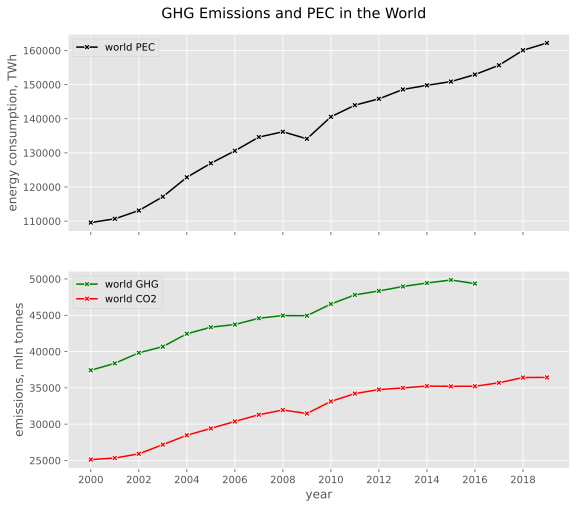

In [23]:
fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(9, 8))

# world energy consumption
sns.lineplot(x=pec.index,
             y=pec.primary_energy_consumption,
             ax=ax0,
             color='black',
             marker='X',
             label='world PEC')

# world ghg
sns.lineplot(x=ghg.index,
             y=ghg.total_ghg,
             ax=ax1,
             color='green',
             marker='X',
             label='world GHG')

# world co2
sns.lineplot(x=ghg.index,
             y=ghg.co2,
             ax=ax1,
             color='red',
             marker='X',
             label='world CO2')

# setting labels and legend
ax0.set_title('GHG Emissions and PEC in the World', x=0.45, y=1.05)
ax0.set_ylabel('energy consumption, TWh')
ax0.legend(loc='upper left')
ax1.set_ylabel('emissions, mln tonnes')
ax1.legend(loc='upper left')

# fig.savefig('graph_1.png', dpi=600)
plt.show()

### Наблюдения
- мысль 1
- мысль 2
- мысль 3

### График 2: World PEC by Source
Посмотрим на распределение потребления энергии в разбивке на источники:

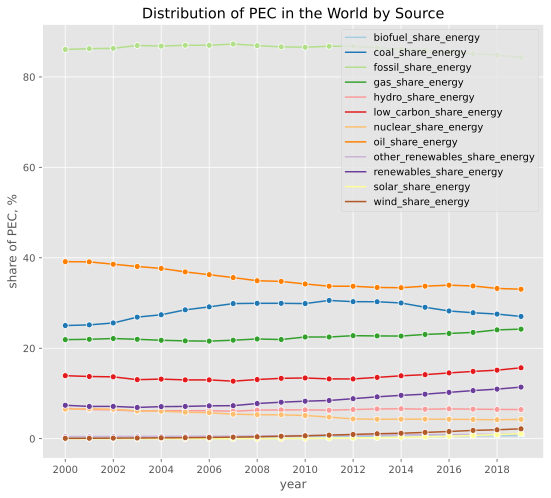

In [24]:
# по аналогии с предыдущим заданием настройте график
fig, ax = plt.subplots(figsize=(9, 8))

# только долевые столбцы
sns.lineplot(data=pec[pec_share_cols],
             palette='Paired',
             marker='o',
             ax=ax,
             dashes=None)

# не забудьте лейблы
plt.title('Distribution of PEC in the World by Source')
plt.ylabel('share of PEC, %')

# plt.savefig('graph_2.png', dpi=600)
plt.show()

Есть ли лучшие варианты показать распределение долей? Какие типы графиков подходят для этого?

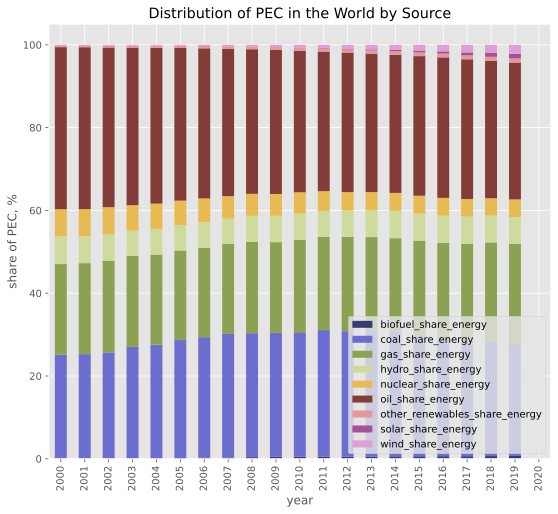

In [25]:
fig, ax = plt.subplots(figsize=(9, 8))
pec[[
    i for i in pec_share_cols
    if i not in (
        'fossil_share_energy',
        'renewables_share_energy',
        'low_carbon_share_energy'
    )
]].plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='tab20b',
    ylabel='share of PEC, %'
)
ax.set_xticklabels(range(2000, 2021))
plt.title('Distribution of PEC in the World by Source')

# plt.savefig('graph_2.png', dpi=600)
plt.show()

### Наблюдения
- раз
- два
- три

### График 3: World GHG Emissions by Source

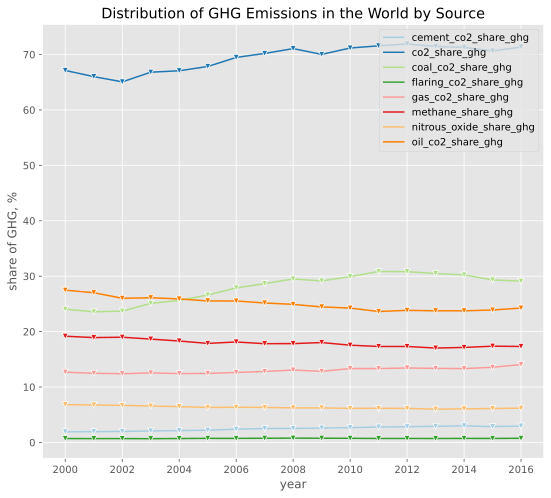

In [26]:
fig, ax = plt.subplots(figsize=(9, 8))

# только долевые столбцы
sns.lineplot(data=ghg[ghg_share_cols],
             palette='Paired',
             marker='v',
             ax=ax,
             dashes=None)

# не забудьте лейблы
plt.title('Distribution of GHG Emissions in the World by Source')
plt.ylabel('share of GHG, %')

plt.show()

Опять же, преобразуйте график - есть лучшие типы графиков для визуализации распределения

### Наблюдения
- уно
- дос
- трес

### График 4: Changes in World PEC Sources and CO₂
Посмотрим на изменения в PEC и выбросах CO₂:

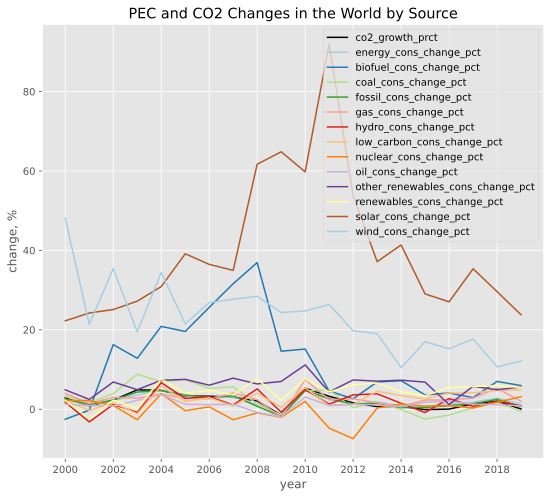

In [27]:
fig, ax = plt.subplots(figsize=(9, 8))

# как всегда, не забудьте лейблы
sns.lineplot(x=ghg.index,
             y=ghg.co2_growth_prct,
             ax=ax,
             color='black',
             label='co2_growth_prct')

sns.lineplot(data=pec[pec_change_cols],
             palette='Paired',
             dashes=None,
             ax=ax)

ax.set_title('PEC and CO2 Changes in the World by Source')
ax.set_ylabel('change, %')

plt.show()

### Observations
- ан
- дё
- труа

### График 5: World PEC per Capita by Source

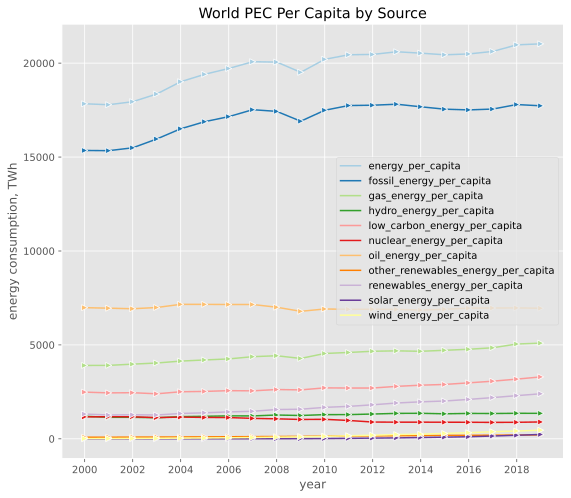

In [28]:
fig, ax = plt.subplots(figsize=(9, 8))

# очевидно, только столбцы <что-то> на человека
sns.lineplot(data=pec[pec_per_capita_cols],
             palette='Paired',
             marker='>',
             ax=ax,
             dashes=None)

# подписи хотят, чтобы вы их сделали
plt.title('World PEC Per Capita by Source')
plt.ylabel('energy consumption, TWh')

plt.show()

### Наблюдения
- если что, можно писать не 3 вывода

### График 6: GHG Emissions per Capita

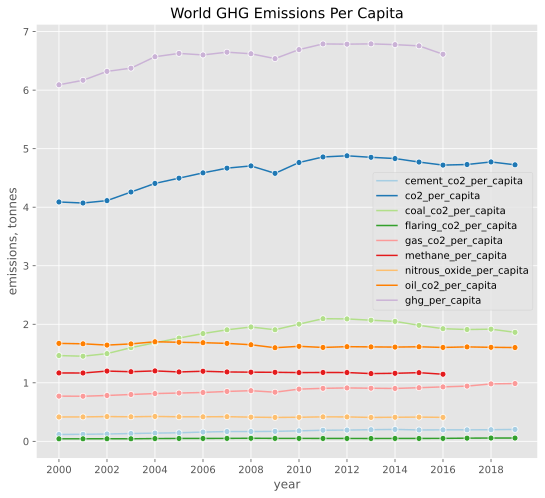

In [29]:
fig, ax = plt.subplots(figsize=(9, 8))

sns.lineplot(data=ghg[ghg_per_capita_cols],
             palette='Paired',
             marker='o',
             ax=ax,
             dashes=None)
plt.title('World GHG Emissions Per Capita')
plt.ylabel('emissions, tonnes')

plt.show()

### Наблюдения
- умный вывод

### График 7: Correlation Matrix between PEC and GHG Emissions
Сложный процесс, поэтому разобьем по шагам:
1. Вертикально соединяем таблицы с ключами
2. Подсчитали корреляцию
3. Выбрали корреляцию между столбцами двух матриц

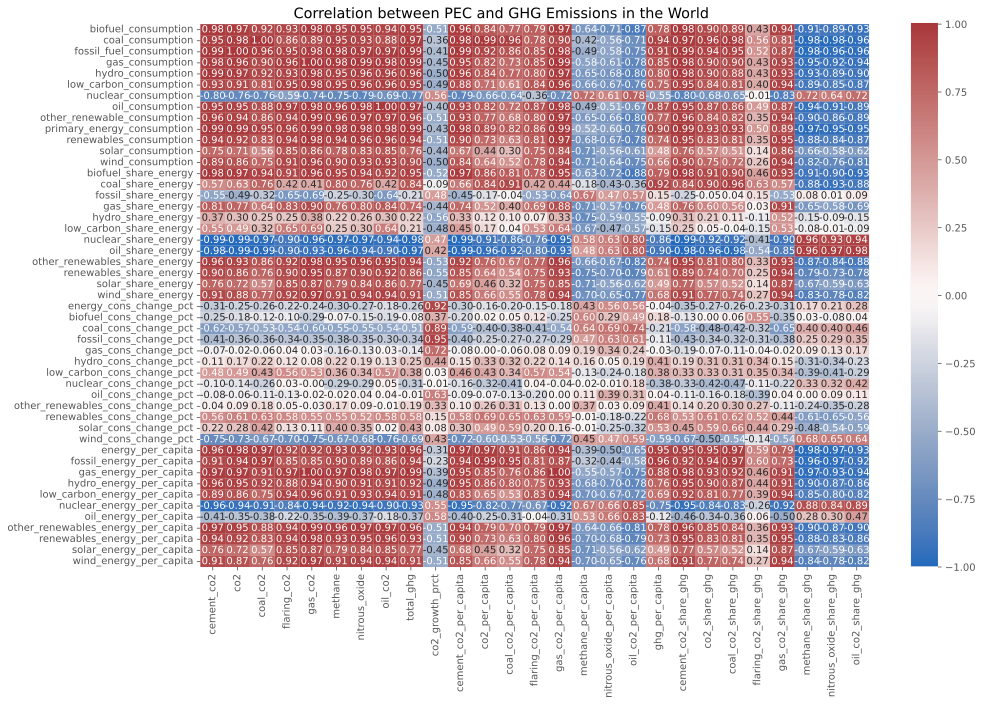

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(
    pd.concat(
        [pec, ghg],
        axis=1,
        keys=['pec', 'ghg']).corr().loc['pec', 'ghg'],
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f',
    cmap='vlag',
    ax=ax
)
plt.title('Correlation between PEC and GHG Emissions in the World', x=0.45)

plt.show()

## Observations
Тут может быть очень много наблюдений, но вспомните бизнес вопрос и выделите только самые важные

## Выводы и ответ на бизнес вопрос
- вывод
- вывод

# Ответ